##Checkpoint 2 | Pedro Henrique Fernandes Lô de Barros - RM97937

###Bibliotecas e Dataframe

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv('Sprint3 Diabetes.csv')

###Matriz de Correlação em HeatMap

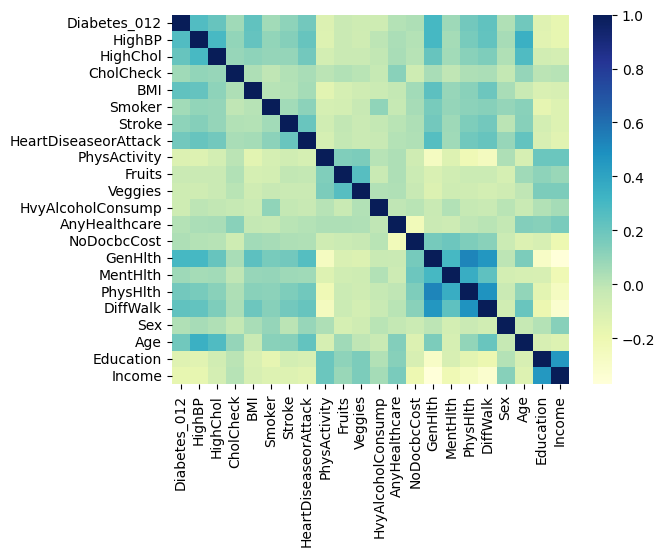

In [ ]:
heatMap = sns.heatmap(df.corr(numeric_only=True), cmap="YlGnBu")

In [ ]:
corrNumerica = df.corr(numeric_only=True)
varAlvo = 'Diabetes_012'
correlacao = corrNumerica[varAlvo].sort_values(ascending=False)
maioresCorrs = correlacao[abs(correlacao) > 0.2]
print(maioresCorrs.sort_values(ascending=False))

Diabetes_012    1.000000
GenHlth         0.302587
HighBP          0.271596
BMI             0.224379
DiffWalk        0.224239
HighChol        0.209085
Name: Diabetes_012, dtype: float64


###Modelo de Previsão com Floresta Aleatória

In [ ]:
X = df[['GenHlth', 'HighBP', 'BMI', 'DiffWalk', 'HighChol']]
Y = df['Diabetes_012']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
modelo = RandomForestClassifier(criterion='entropy', random_state=0)
modelo.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:
Y_previsto = modelo.predict(X_test)

###Matriz de Confusão e Acurácia

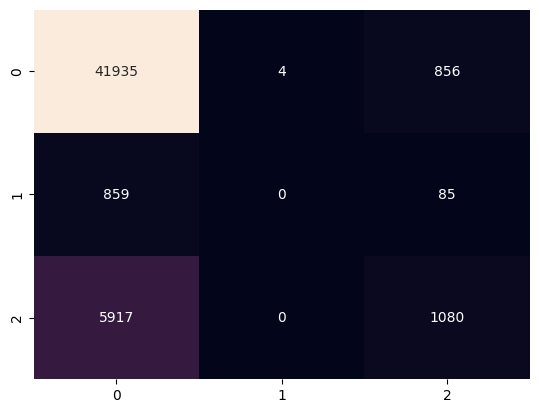

In [ ]:
matriz_confusao = confusion_matrix(Y_test, Y_previsto)
sns.heatmap(matriz_confusao, annot=True, fmt='d', cbar=False)
plt.show()

In [ ]:
accuracy = accuracy_score(Y_test, Y_previsto)
classReport = classification_report(Y_test, Y_previsto, target_names=['Não diabético', 'Pré-diabético', 'Diabético'])

print(f'Acurácia: {accuracy}')
print(f'Relatório de classificação:\n' f'{classReport}')

Acurácia: 0.8478200883002207
Relatório de classificação:
               precision    recall  f1-score   support

Não diabético       0.86      0.98      0.92     42795
Pré-diabético       0.00      0.00      0.00       944
    Diabético       0.53      0.15      0.24      6997

     accuracy                           0.85     50736
    macro avg       0.47      0.38      0.39     50736
 weighted avg       0.80      0.85      0.81     50736



###Conclusão

In [ ]:
#O modelo criado foi testado com diversos níveis de correlação. Dentre todos, o conjunto que proporcionou o melhor
#desempenho de previsão ao modelo foi daqueles que são maiores do que 0.2. Veja a abaixo os vários resultados obtidos para cada caso:

#Correlação > 0.25 ('GenHlth', 'HighBP') | Acurácia = 0.8434
#Correlação > 0.2 ('GenHlth', 'HighBP', 'BMI', 'DiffWalk', 'HighChol') | Acurácia = 0.8478 ------> MELHOR DESEMPENHO
#Correlação > 0.15 ('GenHlth', 'HighBP', 'BMI', 'DiffWalk', 'HighChol', 'Age', 'HeartDiseaseorAttack', 'PhysHlth', 'Income') | Acurácia = 0.8272
#Correlação > 0.1 ('GenHlth', 'HighBP', 'BMI', 'DiffWalk', 'HighChol', 'Age', 'HeartDiseaseorAttack', 'PhysHlth', Stroke, 'MentHlth', 'CholCheck', 'Smoker', 'HvyAlcoholConsump', 'Veggies', 'PhysActivity', 'Education', 'Income') | Acurácia =  0.8394
#Correlação > 0 ('GenHlth', 'HighBP', 'BMI', 'DiffWalk', 'HighChol', 'Age', 'HeartDiseaseorAttack', 'PhysHlth', Stroke, 'MentHlth', 'CholCheck', 'Smoker', 'NoDocbcCost', 'Sex', 'AnyHealthcare', 'Fruits', 'HvyAlcoholConsump', 'Veggies', 'PhysActivity', 'Education', 'Income') | Acurácia = 0.8423

#Tendo encontrado o valor que proporcionou o melhor desempenho possível ao modelo criado e se utilizando deste para a análise final, podemos concluir, por meio da acurácia, que o modelo tem um desempenho razoávelmente bom.
#No entanto, observando o relatório de classificação e a matriz de confusão, nota-se uma grande incapacidade do modelo de prever corretamente os casos de pré-diabéticos e diabéticos.
#Levando estes pontos em consideração, podemos concluir que, apesar do modelo  aparentar ser razoavelmente bom, na prática ele só é de fato bom para determinar não diabéticos,
#tendo um terrível desempenho para classificar os pré-diabéticos e diabéticos, necessitando de um maior aprimoramento.